# Challenger USA Space Shuttle O-Ring distress prediction|

predict the number of O-rings that experience thermal distress on a flight at 31 degrees F 
given data on the previous 23 shuttle flights

In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [115]:
df=pd.read_csv('C:/Users/HP/anaconda3/Untitled Folder/DataScienceProjects/o-ring-erosion-only.csv')
df1=pd.read_csv('C:/Users/HP/anaconda3/Untitled Folder/DataScienceProjects/o-ring-erosion-or-blowby.csv')

In [116]:
df=pd.DataFrame(data=df)

In [117]:
df

,Number_of_O-rings_at_risk_on_a_given_flight,Number experiencing thermal distress,Launch_temperature_(degrees F),Leak-check_pressure_(psi),Temporal_order_of_flight
0,6,0,67,50,5
1,6,0,72,50,6
2,6,0,73,100,7
3,6,0,70,100,8
4,6,1,57,200,9
5,6,1,63,200,10
6,6,1,70,200,11
7,6,0,78,200,12
8,6,0,67,200,13
9,6,2,53,200,14


In [118]:
df1

,Number_of_O-rings_at_risk_on_a_given_flight,Number experiencing thermal distress,Launch_temperature_(degrees F),Leak-check_pressure_(psi),Temporal_order_of_flight
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5
5,6,0,72,50,6
6,6,0,73,100,7
7,6,0,70,100,8
8,6,1,57,200,9
9,6,1,63,200,10


In [119]:
df.dtypes

Number_of_O-rings_at_risk_on_a_given_flight    int64
Number experiencing thermal distress           int64
Launch_temperature_(degrees F)                 int64
Leak-check_pressure_(psi)                      int64
Temporal_order_of_flight                       int64
dtype: object

In [120]:
df_erosion=df.copy()

In [121]:
df_erosion.describe()

,Number_of_O-rings_at_risk_on_a_given_flight,Number experiencing thermal distress,Launch_temperature_(degrees F),Leak-check_pressure_(psi),Temporal_order_of_flight
count,19.0,19.000000,19.000000,19.000000,19.000000
mean,6.0,0.315789,69.842105,173.684211,14.000000
std,0.0,0.582393,7.740680,53.666721,5.627314
min,6.0,0.000000,53.000000,50.000000,5.000000
25%,6.0,0.000000,67.000000,200.000000,9.500000
50%,6.0,0.000000,70.000000,200.000000,14.000000
75%,6.0,0.500000,75.500000,200.000000,18.500000
max,6.0,2.000000,81.000000,200.000000,23.000000


In [122]:
df_erosion.skew()

Number_of_O-rings_at_risk_on_a_given_flight    0.000000
Number experiencing thermal distress           1.765815
Launch_temperature_(degrees F)                -0.731223
Leak-check_pressure_(psi)                     -1.731766
Temporal_order_of_flight                       0.000000
dtype: float64

Number_of_O-rings_at_risk_on_a_given_flight       AxesSubplot(0.125,0.125;0.133621x0.755)
Number experiencing thermal distress           AxesSubplot(0.285345,0.125;0.133621x0.755)
Launch_temperature_(degrees F)                  AxesSubplot(0.44569,0.125;0.133621x0.755)
Leak-check_pressure_(psi)                      AxesSubplot(0.606034,0.125;0.133621x0.755)
Temporal_order_of_flight                       AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

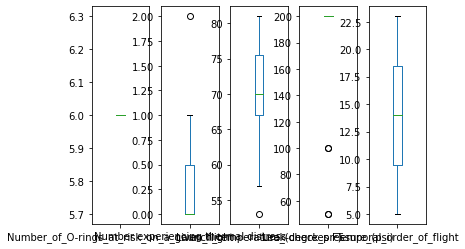

In [123]:
df_erosion.plot(kind='box',subplots=True)

In [124]:
#There is no outliers

array([[<AxesSubplot:title={'center':'Number_of_O-rings_at_risk_on_a_given_flight'}>,
        <AxesSubplot:title={'center':'Number experiencing thermal distress'}>],
       [<AxesSubplot:title={'center':'Launch_temperature_(degrees F)'}>,
        <AxesSubplot:title={'center':'Leak-check_pressure_(psi)'}>],
       [<AxesSubplot:title={'center':'Temporal_order_of_flight'}>,
        <AxesSubplot:>]], dtype=object)

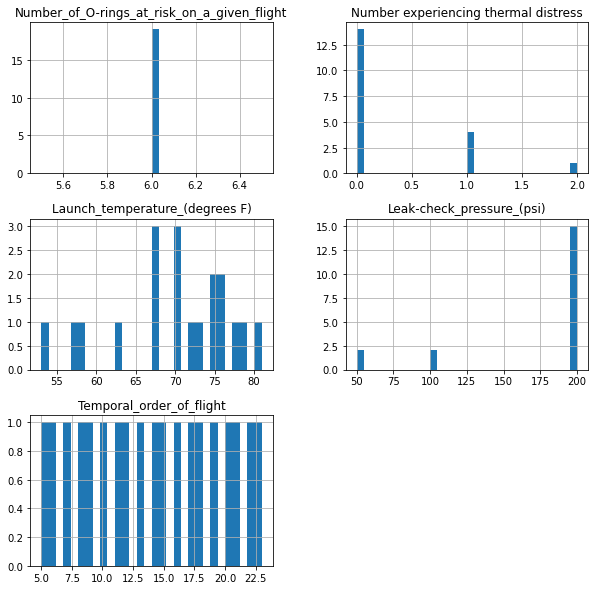

In [125]:
df_erosion.hist(bins=30,figsize=(10,10))

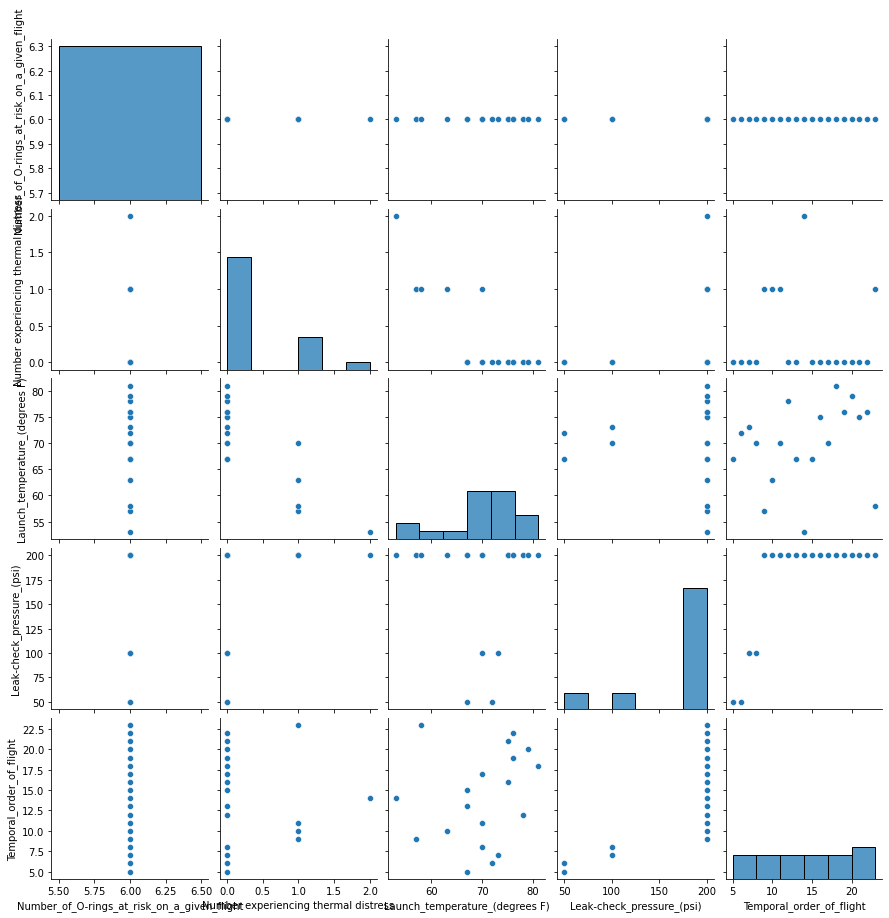

In [126]:
sns.pairplot(df_erosion)

In [127]:
df_erosion['Flight_erosion']=df_erosion['Number experiencing thermal distress']

In [128]:
df_erosion

,Number_of_O-rings_at_risk_on_a_given_flight,Number experiencing thermal distress,Launch_temperature_(degrees F),Leak-check_pressure_(psi),Temporal_order_of_flight,Flight_erosion
0,6,0,67,50,5,0
1,6,0,72,50,6,0
2,6,0,73,100,7,0
3,6,0,70,100,8,0
4,6,1,57,200,9,1
5,6,1,63,200,10,1
6,6,1,70,200,11,1
7,6,0,78,200,12,0
8,6,0,67,200,13,0
9,6,2,53,200,14,2


In [129]:
del df_erosion['Number experiencing thermal distress']

In [130]:
df_erosion

,Number_of_O-rings_at_risk_on_a_given_flight,Launch_temperature_(degrees F),Leak-check_pressure_(psi),Temporal_order_of_flight,Flight_erosion
0,6,67,50,5,0
1,6,72,50,6,0
2,6,73,100,7,0
3,6,70,100,8,0
4,6,57,200,9,1
5,6,63,200,10,1
6,6,70,200,11,1
7,6,78,200,12,0
8,6,67,200,13,0
9,6,53,200,14,2


In [131]:
df1_erosion=df1.copy()

In [132]:
df1_erosion['Flight_erosion']=df1_erosion['Number experiencing thermal distress']

In [133]:
df1_erosion

,Number_of_O-rings_at_risk_on_a_given_flight,Number experiencing thermal distress,Launch_temperature_(degrees F),Leak-check_pressure_(psi),Temporal_order_of_flight,Flight_erosion
0,6,0,66,50,1,0
1,6,1,70,50,2,1
2,6,0,69,50,3,0
3,6,0,68,50,4,0
4,6,0,67,50,5,0
5,6,0,72,50,6,0
6,6,0,73,100,7,0
7,6,0,70,100,8,0
8,6,1,57,200,9,1
9,6,1,63,200,10,1


In [134]:
del df1_erosion['Number experiencing thermal distress']

In [135]:
df_merge=pd.concat([df_erosion,df1_erosion])

In [136]:
df_merge

,Number_of_O-rings_at_risk_on_a_given_flight,Launch_temperature_(degrees F),Leak-check_pressure_(psi),Temporal_order_of_flight,Flight_erosion
0,6,67,50,5,0
1,6,72,50,6,0
2,6,73,100,7,0
3,6,70,100,8,0
4,6,57,200,9,1
5,6,63,200,10,1
6,6,70,200,11,1
7,6,78,200,12,0
8,6,67,200,13,0
9,6,53,200,14,2


In [137]:
del df_merge['Temporal_order_of_flight']

In [138]:
df_merge

,Number_of_O-rings_at_risk_on_a_given_flight,Launch_temperature_(degrees F),Leak-check_pressure_(psi),Flight_erosion
0,6,67,50,0
1,6,72,50,0
2,6,73,100,0
3,6,70,100,0
4,6,57,200,1
5,6,63,200,1
6,6,70,200,1
7,6,78,200,0
8,6,67,200,0
9,6,53,200,2


Number_of_O-rings_at_risk_on_a_given_flight       AxesSubplot(0.125,0.125;0.168478x0.755)
Launch_temperature_(degrees F)                 AxesSubplot(0.327174,0.125;0.168478x0.755)
Leak-check_pressure_(psi)                      AxesSubplot(0.529348,0.125;0.168478x0.755)
Flight_erosion                                 AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

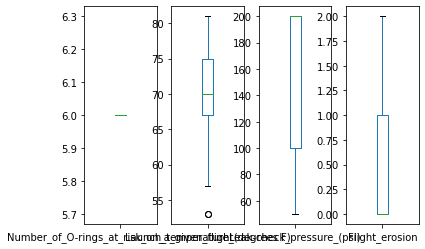

In [139]:
df_merge.plot(kind='box',subplots=True)

array([[<AxesSubplot:title={'center':'Number_of_O-rings_at_risk_on_a_given_flight'}>,
        <AxesSubplot:title={'center':'Launch_temperature_(degrees F)'}>],
       [<AxesSubplot:title={'center':'Leak-check_pressure_(psi)'}>,
        <AxesSubplot:title={'center':'Flight_erosion'}>]], dtype=object)

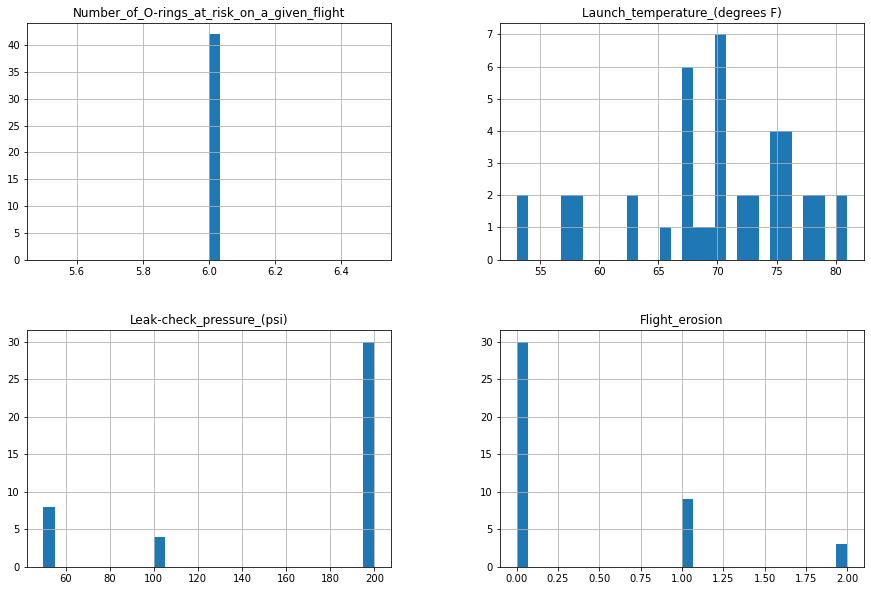

In [140]:
df_merge.hist(bins=30,figsize=(15,10))

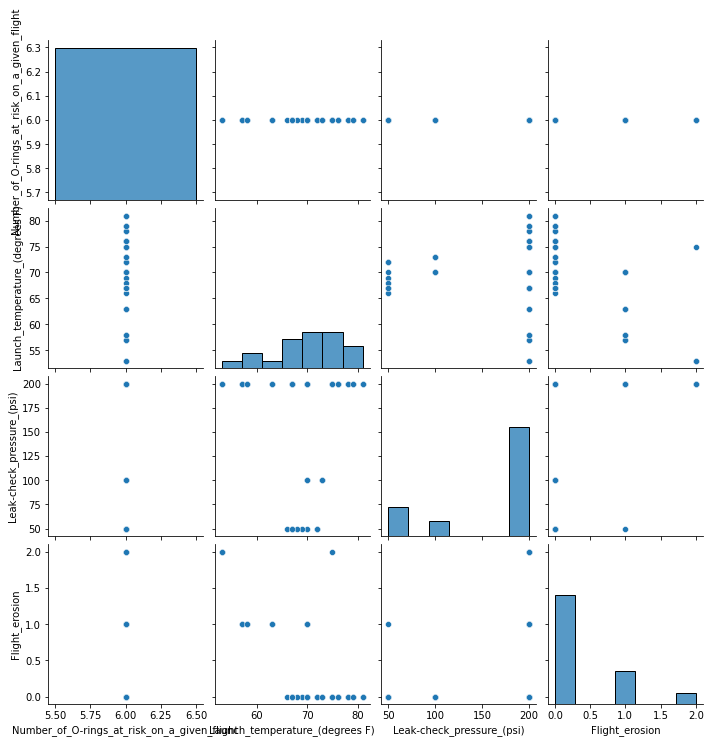

In [141]:
sns.pairplot(df_merge)

In [142]:
x=df_merge.iloc[:,0:-1]

In [143]:
y=df_merge.iloc[:,-1]

In [161]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=55)

In [162]:
lm= LinearRegression()

In [163]:
lm.fit(x_train,y_train)

LinearRegression()

In [164]:
lm.coef_

array([ 0.        , -0.04947462,  0.00331143])

In [165]:
lm.intercept_

3.2251755008011624

In [166]:
df_merge.columns

Index(['Number_of_O-rings_at_risk_on_a_given_flight',
       'Launch_temperature_(degrees F)', 'Leak-check_pressure_(psi)',
       'Flight_erosion'],
      dtype='object')

In [167]:
lm.score(x_train,y_train)

0.4041192331857567

In [168]:
pred=lm.predict(x_test)
print("Predicted number of O_rings that experience thermal distress",pred)
print("Actual-",y_test)

Predicted number of O_rings that experience thermal distress [-0.0724764   0.09309488 -0.05532897 -0.11998335  0.42423743  0.12738973
  1.01793284  0.77055975  1.06740745  0.12738973  1.26530592 -0.05532897
  0.57266128]
Actual- 1     1
3     0
2     0
17    0
6     1
21    0
18    1
5     1
4     1
18    0
9     2
6     0
12    0
Name: Flight_erosion, dtype: int64


In [169]:
print("Error")
print("Mean Absolute error",mean_absolute_error(pred,y_test))
print("Mean predicted error",mean_squared_error(pred,y_test))
print("Root mean squared error",np.sqrt(mean_squared_error(pred,y_test)))


Error
Mean Absolute error 0.29606850059457224
Mean predicted error 0.18989032454044483
Root mean squared error 0.43576406981352284


In [170]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.5280666934215417


In [216]:
t=np.array([6,55,120])

In [217]:
t.shape

(3,)

In [218]:
t=t.reshape(1,-1)

In [219]:
t

array([[  6,  55, 120]])

In [220]:
t.shape

(1, 3)

In [221]:
output=np.round(lm.predict(t),0)

In [223]:
print("The total number of O-rings that is under thermal distress are/is",int(output))

The total number of O-rings that is under thermal distress are/is 1
